In [2]:
from core.Generators import CycleGanGenerator
from core.Discriminator import Discriminator 
from Gan_train import Gray_GanTrainer
from config import CycleGANConfig as config
from core.data_loader import Gray_RGB_dataset,get_gray_train_loader,get_gray_test_loader, get_train_loader
from torchsummary import summary
import torch
import argparse
import torchvision.utils as tvutils
import os
from torchvision import transforms
from Gan_main import main

Preparing DataLoader to fetch RGB,Gray images during the training phase...


In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
vgg = CycleGanGenerator().to(device) 
summary(vgg, (3, 256, 256))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           9,408
    InstanceNorm2d-2         [-1, 64, 256, 256]             128
         LeakyReLU-3         [-1, 64, 256, 256]               0
         LeakyReLU-4         [-1, 64, 256, 256]               0
            Conv2d-5        [-1, 128, 128, 128]          73,728
    InstanceNorm2d-6        [-1, 128, 128, 128]             256
         LeakyReLU-7        [-1, 128, 128, 128]               0
         LeakyReLU-8        [-1, 128, 128, 128]               0
            Conv2d-9        [-1, 256, 132, 132]         294,912
   InstanceNorm2d-10        [-1, 256, 132, 132]             512
        LeakyReLU-11        [-1, 256, 132, 132]               0
        LeakyReLU-12        [-1, 256, 132, 132]               0
   InstanceNorm2d-13        [-1, 256, 132, 132]             512
        LeakyReLU-14        [-1, 256, 1

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
vgg = Discriminator().to(device) 
summary(vgg, (3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 256, 256]             864
         LeakyReLU-2         [-1, 32, 256, 256]               0
            Conv2d-3         [-1, 64, 128, 128]          18,432
         LeakyReLU-4         [-1, 64, 128, 128]               0
            Conv2d-5         [-1, 64, 128, 128]          36,864
       BatchNorm2d-6         [-1, 64, 128, 128]             128
         LeakyReLU-7         [-1, 64, 128, 128]               0
            Conv2d-8          [-1, 128, 64, 64]          73,728
         LeakyReLU-9          [-1, 128, 64, 64]               0
           Conv2d-10          [-1, 128, 64, 64]         147,456
      BatchNorm2d-11          [-1, 128, 64, 64]             256
        LeakyReLU-12          [-1, 128, 64, 64]               0
           Conv2d-13          [-1, 256, 64, 64]         294,912
      BatchNorm2d-14          [-1, 256,

In [2]:
from core.Generators import CycleGanGenerator
from core.Discriminator import Discriminator 
from Gan_train import Gray_GanTrainer
from config import CycleGANConfig as config
from core.data_loader import Gray_RGB_dataset,get_gray_train_loader,get_gray_test_loader, get_train_loader
from torchsummary import summary
import torch
import torchvision
import argparse
import torchvision.utils as tvutils
import os
from torchvision import transforms
from Gan_main import main
import matplotlib.pyplot as plt

Preparing DataLoader to fetch RGB,Gray images during the training phase...


Preparing DataLoader to fetch RGB,Gray images during the training phase...


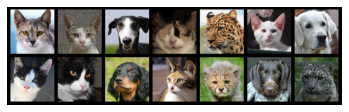

In [29]:
loader=get_gray_train_loader("./data/afhq",batch_size=14)
k=0
for (img,gray_img) in loader:
    plt.axis('off')
    plt.imshow(torchvision.utils.make_grid(img,nrow=7,padding=20,pad_value=0.0,normalize=True).permute(1,2,0))
    plt.savefig("assets/affq_dataset.png",dpi=300)
    plt.show()
    k+=1
    if k==1:
        break

Preparing DataLoader to fetch RGB,Gray images during the training phase...


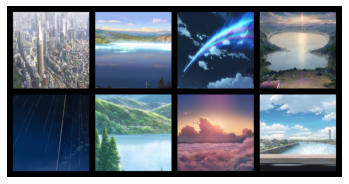

In [19]:
loader=get_gray_train_loader("./data/hi",batch_size=8)
k=0
for (img,gray_img) in loader:
    plt.axis('off')
    plt.imshow(torchvision.utils.make_grid(img,nrow=4,padding=20,pad_value=0.0,normalize=True).permute(1,2,0))
    plt.savefig("assets/yourname.png",dpi=500)
    plt.show()
    k+=1
    if k==1:
        break